In [3]:
import numpy as np
from scipy.special import comb

from sympy import S, Symbol, integrate, simplify, solve, Interval, Rational
from matplotlib import pyplot as plt
from functools import lru_cache
import sys

sys.set_int_max_str_digits(0)


In [4]:
def aux(l, n):
    # in theory should be n - i - (n-i-1)  but not wokrs
    res = [None]*l
    center = (l+1)//2
    for i in range(center):
        res[i] = center - i
        res[l-i-1] = center-i
    return res[n]

@lru_cache
def mP(n=1):
    
    if n==1:
        return S(1)
    if n==2:
        return Rational(3, 4)
    # print(f"funciton with {n}")

    I, B = [0] + (n-1)*[None] + [1], n*[None]

    n1 = Symbol("n1", domain=Interval(0, 1))
    for i in range(n):
        B[i] = int(comb(n-1,i)) * mP(aux(n,i)) * (1-n1)**(n-i-1) * n1**(i)

    for i in range(0, n-1):
        I[i+1] = solve(B[i] > B[i+1], n1).as_set().intersect(Interval(0, 1)).end
    print(f"{n=}")
    print(B)
    print(I)
    return sum([integrate(B[i], (n1, Interval(I[i],I[i+1]))) for i in range(n)])


n=3
[3*(1 - n1)**2/4, n1*(2 - 2*n1), 3*n1**2/4]
[0, 3/11, 8/11, 1]
n=4
[3*(1 - n1)**3/4, 3*n1*(1 - n1)**2, n1**2*(3 - 3*n1), 3*n1**3/4]
[0, 1/5, 1/2, 4/5, 1]
n=5
[377*(1 - n1)**4/726, 3*n1*(1 - n1)**3, 6*n1**2*(1 - n1)**2, n1**3*(3 - 3*n1), 377*n1**4/726]
[0, 377/2555, 1/3, 2/3, 2178/2555, 1]
n=6
[377*(1 - n1)**5/726, 15*n1*(1 - n1)**4/4, 10*n1**2*(1 - n1)**3, 10*n1**3*(1 - n1)**2, n1**4*(15/4 - 15*n1/4), 377*n1**5/726]
[0, 754/6199, 3/11, 1/2, 8/11, 5445/6199, 1]
n=7
[1899*(1 - n1)**6/4000, 377*n1*(1 - n1)**5/121, 45*n1**2*(1 - n1)**4/4, 20*n1**3*(1 - n1)**3, 45*n1**4*(1 - n1)**2/4, n1**5*(377/121 - 377*n1/121), 1899*n1**6/4000]
[0, 229779/1737779, 1508/6953, 9/25, 16/25, 5445/6953, 1508000/1737779, 1]
n=8
[1899*(1 - n1)**7/4000, 2639*n1*(1 - n1)**6/726, 63*n1**2*(1 - n1)**5/4, 35*n1**3*(1 - n1)**4, 35*n1**4*(1 - n1)**3, 63*n1**5*(1 - n1)**2/4, n1**6*(2639/726 - 2639*n1/726), 1899*n1**7/4000]
[0, 689337/5967337, 754/4021, 9/29, 1/2, 20/29, 3267/4021, 5278000/5967337, 1]
n=9
[797991571

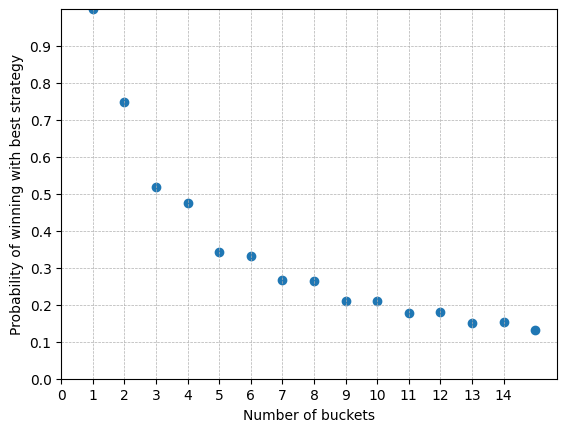

In [5]:
x =  range(1, 16)
prob = np.array([mP(i) for i in x])
plt.scatter(x, prob)
plt.ylim([0,1])
plt.xlabel('Number of buckets')
plt.ylabel('Probability of winning with best strategy')
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 15, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [6]:
prob.astype(np.float64)

array([1.        , 0.75      , 0.51928375, 0.47475   , 0.34390366,
       0.33334497, 0.26813473, 0.2652564 , 0.21015842, 0.21128423,
       0.17778488, 0.17995643, 0.15048417, 0.15332015, 0.13285831])

In [7]:
(prob[1:]/prob[:-1]).astype(float)

array([0.75      , 0.69237833, 0.91424005, 0.72438897, 0.96929752,
       0.8043761 , 0.98926538, 0.79228407, 1.00535695, 0.8414489 ,
       1.01221446, 0.83622558, 1.01884572, 0.86654174])

In [8]:
x = np.append(np.array(range(1, 16)), 100)
y = np.array([
    1, 0.75      , 0.51928375, 0.47475   , 0.34390366, 0.33334497,
    0.26813473, 0.2652564 , 0.21015842, 0.21128423, 0.17778488,
    0.17995643, 0.15048417, 0.15332015, 0.13285831, 0.01
])
weights = np.array([100, 1, 0.8, 0.6, 0.4, 0.3, 0.3, 0.4, 0.6, 0.8, 1, 1, 1, 1,50,100])
sigma_values = 1 / weights

In [9]:
len(sigma_values)

16

In [10]:
from scipy.optimize import curve_fit

# Define the function to be fitted without the constraint
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# Use curve_fit to fit the function to the data
params_unconstrained, covariance_unconstrained = curve_fit(exponential_decay, x, y, p0=(1, 0.1)) # , sigma=sigma_values

# Predicted values using the fitted parameters for the unconstrained function
y_fit_unconstrained = exponential_decay(x, *params_unconstrained)


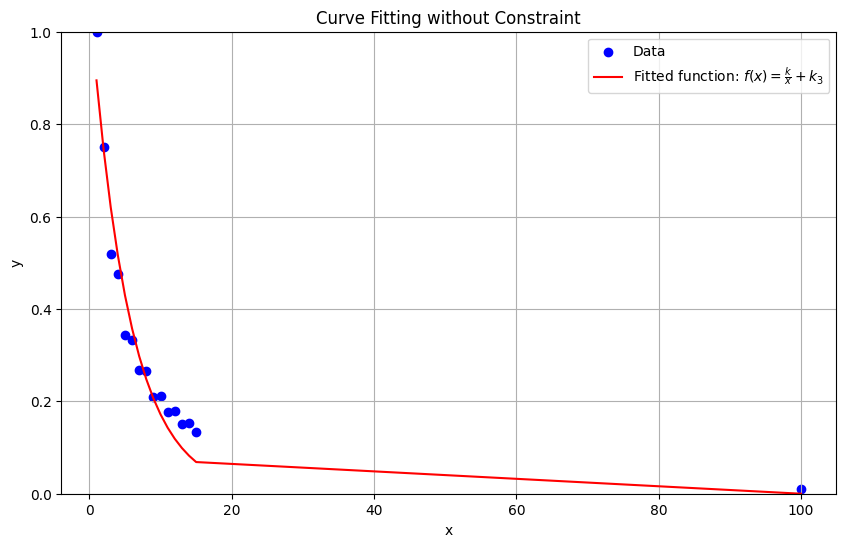

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_fit_unconstrained, color='red', label='Fitted function: $f(x) = \\frac{k}{x} + k_3$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,1])
plt.title('Curve Fitting without Constraint')
plt.grid(True)
plt.show()

In [12]:
P= {}
P[1] = 1
P[2] = Rational(3,4)

In [13]:
# P2
# {n}{0}
# {0}{n}
n =2 
I, B = n*[None], n*[None]

B[0] = comb(1,0) * P[1] * (1-n1)
B[1] = comb(1,1) * P[1] * n1

I[0] =  solve(B[0] >  B[1]).as_set().intersect(Interval(0, 1))
P[2] = 2* integrate(B[0] , (n1,I[0])) 
P[2] # 3/4


# P3
# {1}{0}{0}
# {0}{1}{0}
# {0}{0}{1}

P3L = comb(2,0) * P[2] * (1- n1)**2 
P3C = comb(2,1) * P[1] * (1- n1) * n1
P3R = comb(2,2) * P[2] * n1**2

interval_opt_1 = solve(P3L - P3C > 0, n1).as_set().intersect(Interval(0, 1))
interval_opt_2 = ((P3C > P3R) & (P3C > P3L)).as_set().intersect(Interval(0, 1))
# interval_opt_3 = solve(P3R - P3C > 0, n1).as_set().intersect(Interval(0, 1))

# interval_center 
# P3 = integrate(P3L, (n1,interval_opt_1)) + integrate(P3C, (n1,interval_opt_2)) + integrate(P3C, (n1,interval_opt_3)) 
P[3] = 2*integrate(P3L, (n1,interval_opt_1)) + integrate(P3C, (n1,interval_opt_2))
P[3]



NameError: name 'n1' is not defined

In [ ]:
# P3
# {1}{0}{0}
# {0}{1}{0}
# {0}{0}{1}

P3L = comb(2,0) * P[2] * (1- n1)**2 
P3C = comb(2,1) * P[1] * P[1] * (1- n1) * n1
P3R = comb(2,2) * P[2] * n1**2

In [ ]:
# P4
# {1}{0}{0}{0}
# {0}{1}{0}{0}
# {0}{0}{1}{0}
# {0}{0}{0}{1}
P41 = comb(3,0) * P[3] * (1- n1)**3
P42 = comb(3,0) * P[2] * P[1] * (1- n1)**2 * n1

In [ ]:
# P3
# {1}{0}{0}
# {0}{1}{0}
# {0}{0}{1}

# thi is odd we only need 0 and 1 
n = 3
I, B = [0] + (n-1)*[None] , n*[None]

n1 = Symbol("n1", domain=Interval(0, 1))
half = (n+1)//2
print('half', half)
for i in range(0, half+1):
    B[i] = int(comb(2,i)) * P[abs(1-i)+1] * (1- n1)**(2-i) * n1**(i)

for i in range(0, half):
    # not well done as need to accumulate intevals not substract prev
    I[i+1] = solve(B[i] > B[i+1], n1).as_set().intersect(Interval(0, Rational(1,2))).end

print(B)
print(I)

P[3] = sum([2*integrate(B[i], (n1, Interval(I[i],I[i+1]))) for i in range(half)])
P[3]

half 2
[3*(1 - n1)**2/4, n1*(2 - 2*n1), 3*n1**2/4]
[0, 3/11, 1/2]


377/726

In [ ]:
mP(3)

377/726

In [ ]:
list(range(0, 1))

[0]

In [ ]:
# for even we need 0 and 1 as well

n = 4
half = (n+1)//2 + 1
I, B = [0] + (n-1)*[None] , n*[None]

n1 = Symbol("n1", domain=Interval(0, 1))

print('half', half)
for i in range(0, half+1):
    B[i] = int(comb(2,i)) * P[abs(1-i)+1] * (1- n1)**(2-i) * n1**(i)

for i in range(0, half):
    # not well done as need to accumulate intevals not substract prev
    I[i+1] = solve(B[i] > B[i+1], n1).as_set().intersect(Interval(0, Rational(1,2))).end

print(B)
print(I)

P[4] = sum([2*integrate(B[i], (n1, Interval(I[i],I[i+1]))) for i in range(half+ 1)])
P[4]

half 3
[3*(1 - n1)**2/4, n1*(2 - 2*n1), 3*n1**2/4, 0]
[0, 3/11, 1/2, 1/2]


NotImplementedError: Relational or single Interval

In [ ]:
import math
n = 5
k = 2



10

In [ ]:
%timeit int(comb(n, k))
%timeit math.comb(n, k)

4.14 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


50 ns ± 1.96 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [ ]:
from sympy.stats import Binomial, density
from sympy import S, Symbol

In [ ]:
X = Binomial("n1", 3, Rational(1,2))

In [ ]:
density(X)

BinomialDistribution(3, 1/2, 1, 0)

ValueError: list.remove(x): x not in list

In [1]:
from my_sort import p_distributions, thresholds, plot_strategy_domains, plot_partition_tree, mP
from sympy.stats import Binomial, density
from sympy import Symbol, integrate, solve, Interval, Rational
from math import comb
import numpy as np
from matplotlib import pyplot as plt
from sympy import lambdify, Symbol, Interval

In [10]:
p_distributions(10, rational=False)

KeyboardInterrupt: 

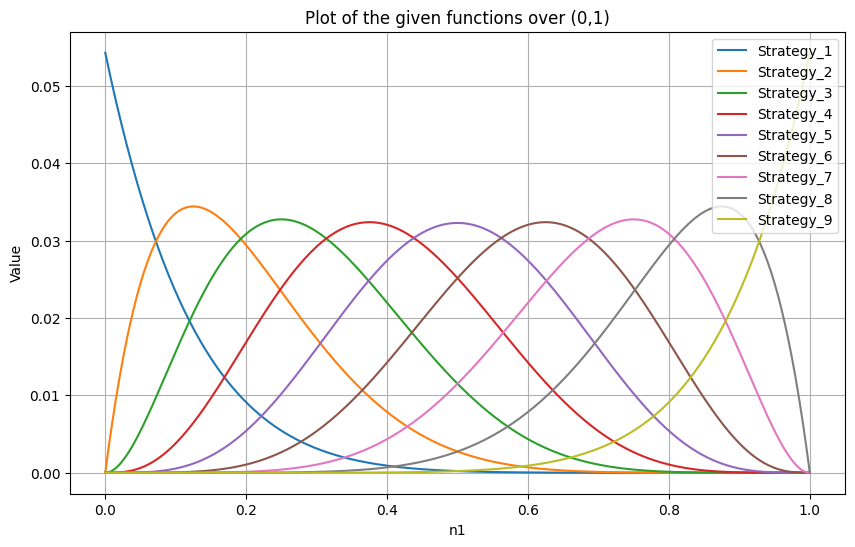

In [5]:
plot_strategy_domains(9)

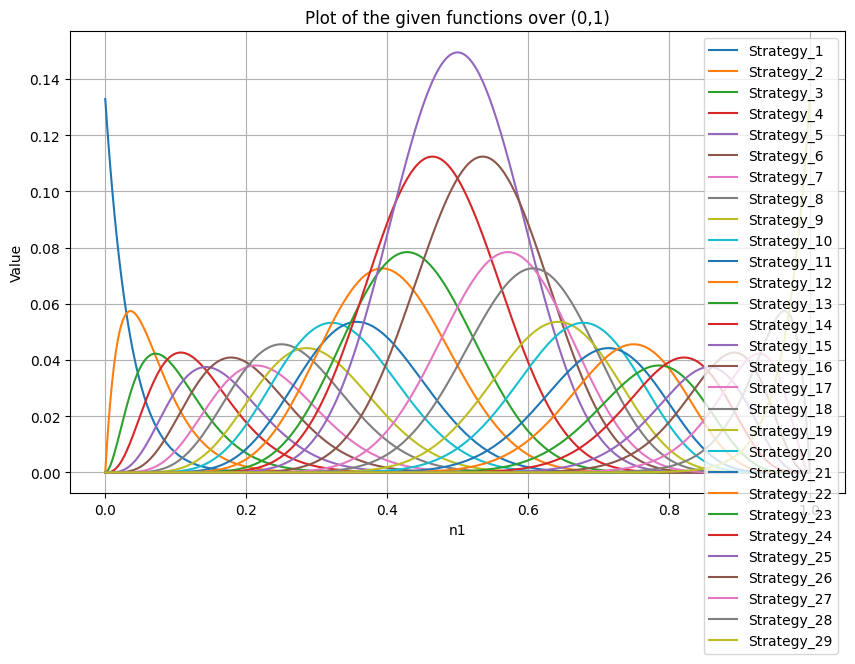

In [ ]:
plot_strategy_domains(29)

In [ ]:
dists = p_distributions(20)

In [ ]:
def thresholds(dists):
    # need to review if there could be double burried distributions
    # that do not get catched by this algorithm
    # thought an algorithm that discovers deeply burried distributions may be way more complex
    # specially in computation time
    boundaries = [solve(dists[0]/dists[1]-1)]
    used_dists = [dists[0]]
    for i in range(1, len(dists)-1):
        next_boundary = solve(dists[i]/dists[i+1]-1)
        prev_boundary = solve(dists[i-1]/dists[i]-1)
        if next_boundary < prev_boundary:
            pass # is burried
        else:
            boundaries.append(next_boundary)
            used_dists.append(dists[i])
    return boundaries, used_dists

In [ ]:
thresholds(dists)

5
7
12
14


[[135789580760105417102390138228370557092626118678573937955719534260740023926597819478223105620048682105047570331263328698186971432829664859643333916824203975937595758419812232743046146097859350755333659720725816532970846679343272119142517155301585539559525329129306718381179120781191730373163028593285943366927417606512167756725927351785191574981101156012155748626939834215245391375765928525433628054132453458224308270933512492827374684954740247292772182375162090197635505184004585725959766816367909166600976357982208/2702044310339970504528958451490570793835569510874479893257725485497901769946088315583400133444435049778442259166946089578785817488599496612289095111240221445489142006133838259666757751312572998642513250391170253992727409628977215036873466412745954594983858919518105722673216516007676927551470559691600002186226994553619646138968135263206333326564054913609548527350183885243912733076790981771456846340489753305510874096424369148693364767218761298226736099706284917783855748506716914

In [ ]:
thresholds(dists)

[[135789580760105417102390138228370557092626118678573937955719534260740023926597819478223105620048682105047570331263328698186971432829664859643333916824203975937595758419812232743046146097859350755333659720725816532970846679343272119142517155301585539559525329129306718381179120781191730373163028593285943366927417606512167756725927351785191574981101156012155748626939834215245391375765928525433628054132453458224308270933512492827374684954740247292772182375162090197635505184004585725959766816367909166600976357982208/2702044310339970504528958451490570793835569510874479893257725485497901769946088315583400133444435049778442259166946089578785817488599496612289095111240221445489142006133838259666757751312572998642513250391170253992727409628977215036873466412745954594983858919518105722673216516007676927551470559691600002186226994553619646138968135263206333326564054913609548527350183885243912733076790981771456846340489753305510874096424369148693364767218761298226736099706284917783855748506716914

In [ ]:
n =4
[aux(n,i) for i in range(n)]

[2, 1, 1, 2]

In [ ]:
p_distributions(10)

[79799157150978026*(1 - n1)**9/232039276131403125,
 17091*n1*(1 - n1)**8/4000,
 2262*n1**2*(1 - n1)**7/121,
 63*n1**3*(1 - n1)**6,
 126*n1**4*(1 - n1)**5,
 126*n1**5*(1 - n1)**4,
 63*n1**6*(1 - n1)**3,
 2262*n1**7*(1 - n1)**2/121,
 1899*n1**8*(9 - 9*n1)/4000,
 79799157150978026*n1**9/232039276131403125]

In [ ]:
# need to check if the distribution is burried

In [ ]:
%timeit solve((dists[0]-dists[1]))

12.2 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit solve(dists[0]/dists[1]-1)

695 µs ± 43.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
first_colsolve((dists[0]-dists[1]))

[135789580760105417102390138228370557092626118678573937955719534260740023926597819478223105620048682105047570331263328698186971432829664859643333916824203975937595758419812232743046146097859350755333659720725816532970846679343272119142517155301585539559525329129306718381179120781191730373163028593285943366927417606512167756725927351785191574981101156012155748626939834215245391375765928525433628054132453458224308270933512492827374684954740247292772182375162090197635505184004585725959766816367909166600976357982208/27020443103399705045289584514905707938355695108744798932577254854979017699460883155834001334444350497784422591669460895787858174885994966122890951112402214454891420061338382596667577513125729986425132503911702539927274096289772150368734664127459545949838589195181057226732165160076769275514705596916000021862269945536196461389681352632063333265640549136095485273501838852439127330767909817714568463404897533055108740964243691486933647672187612982267360997062849177838557485067169141

In [ ]:
solve(dists[0]/dists[1]-1)

[135789580760105417102390138228370557092626118678573937955719534260740023926597819478223105620048682105047570331263328698186971432829664859643333916824203975937595758419812232743046146097859350755333659720725816532970846679343272119142517155301585539559525329129306718381179120781191730373163028593285943366927417606512167756725927351785191574981101156012155748626939834215245391375765928525433628054132453458224308270933512492827374684954740247292772182375162090197635505184004585725959766816367909166600976357982208/27020443103399705045289584514905707938355695108744798932577254854979017699460883155834001334444350497784422591669460895787858174885994966122890951112402214454891420061338382596667577513125729986425132503911702539927274096289772150368734664127459545949838589195181057226732165160076769275514705596916000021862269945536196461389681352632063333265640549136095485273501838852439127330767909817714568463404897533055108740964243691486933647672187612982267360997062849177838557485067169141

In [ ]:
dists[0]-dists[1]

-16752373068384551849320400318762377415766613322965642677210220031608225272219940531978413860934926784106087305883124091798271318049517130199133462059729593199876283627896067697906940603365065701307196335886641972861096594979010124959576223688131435611*n1*(1 - n1)**18/4195424764737972842480240012914735318580989355880716146118710837833906535862382728351085566055959805200582153757981322449923616894900327650013026237016078329492869294789974959915586505525706193140209075339157158357778829209164807403233907677593600000 + 34607042192014443301861342194018628892603099112473919669765472497825501428896145145735138834140762128589901082080262109140033309953077692619673555944713071762092626474017441944985962302517147216703644504369963548155628158977522375437818549117115997827204998514542777023711007316535448193*(1 - n1)**19/163793777579564826990709666796884918962781923948769985418597930413101505073538455200131162807856586484430263923476475001837823189276436722869469872650802921284985701376108568371

In [ ]:
np.array(thresholds(10)).astype(float)

array([0.07449198, 0.18603895, 0.22883156, 0.33333333, 0.5       ,
       0.66666667, 0.77116844, 0.81396105, 0.92550802])

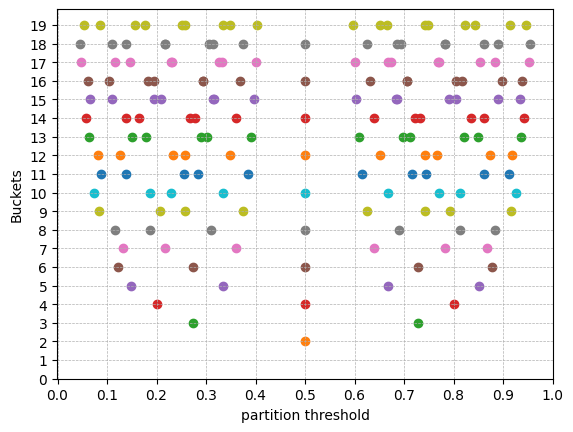

In [ ]:
plot_partition_tree(20)